In [2]:
import pandas as pd
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'loss')

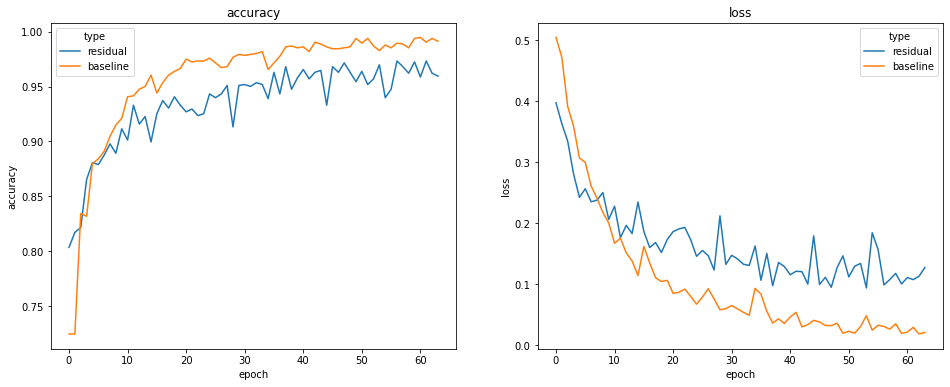

In [9]:
residual = EventAccumulator('../logs/ptbdb_residual_cnn/version_1')
residual.Reload()
baseline = EventAccumulator('../logs/ptbdb_baseline_cnn/version_1')
baseline.Reload()
residual_accs = [e.value for e in residual.Scalars("val_acc")]
baseline_accs = [e.value for e in baseline.Scalars("val_acc")]
residual_loss = [e.value for e in residual.Scalars("val_loss")]
baseline_loss = [e.value for e in baseline.Scalars("val_loss")]
df_acc = pd.DataFrame({"residual": residual_accs, "baseline": baseline_accs})
df_loss = pd.DataFrame({"residual": residual_loss, "baseline": baseline_loss})
df_acc = df_acc.reset_index().melt("index", var_name="type", value_name="accuracy").rename(columns={"index": "epoch"})
df_loss = df_loss.reset_index().melt("index", var_name="type", value_name="loss").rename(columns={"index": "epoch"})
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=df_acc, x="epoch", y="accuracy", hue="type").set_title("accuracy")
plt.subplot(1, 2, 2)
sns.lineplot(data=df_loss, x="epoch", y="loss", hue="type").set_title("loss")

Text(0.5, 1.0, 'loss')

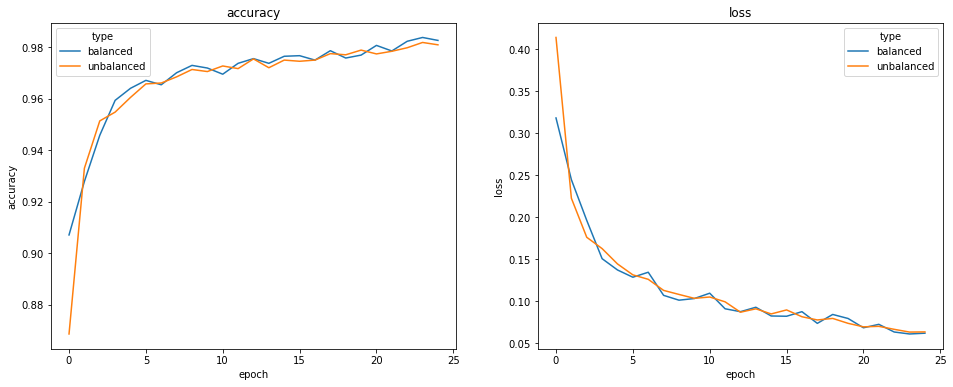

In [8]:
balanced = EventAccumulator('../logs/mitbih_balanced_baseline_cnn/version_1')
unbalanced = EventAccumulator('../logs/mitbih_unbalanced_baseline_cnn/version_0')
balanced.Reload()
unbalanced.Reload()
balanced_accs = [e.value for e in balanced.Scalars("val_acc")]
unbalanced_accs = [e.value for e in unbalanced.Scalars("val_acc")]
balanced_loss = [e.value for e in balanced.Scalars("val_loss")]
unbalanced_loss = [e.value for e in unbalanced.Scalars("val_loss")]
df_acc = pd.DataFrame({"balanced": balanced_accs, "unbalanced": unbalanced_accs})
df_loss = pd.DataFrame({"balanced": balanced_loss, "unbalanced": unbalanced_loss})
df_acc = df_acc.reset_index().melt("index", var_name="type", value_name="accuracy").rename(columns={"index": "epoch"})
df_loss = df_loss.reset_index().melt("index", var_name="type", value_name="loss").rename(columns={"index": "epoch"})
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=df_acc, x="epoch", y="accuracy", hue="type").set_title("accuracy")
plt.subplot(1, 2, 2)
sns.lineplot(data=df_loss, x="epoch", y="loss", hue="type").set_title("loss")